# Reimplimentation of "Ensembles of One Class Support Vector Machines" (Shieh & Kamm, 2009)
## Author: Michael Armstrong | <ArmstrongAMichael@gmail.com>

## Load Dependencies & Setup

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.svm import OneClassSVM
from sklearn.ensemble import BaggingClassifier
plt.style.use('seaborn-whitegrid')

## Linear Data

In [46]:
number_of_negative_entries = 50
number_of_positive_entries = 400

### Generate Data Sets

In [47]:
train_data = np.zeros((number_of_positive_entries+number_of_negative_entries, 2))
# Generate Linear Dataset (Positive)
for n in range(number_of_positive_entries):
    train_data[n][0] = random.uniform(0,3)
    train_data[n][1] = train_data[n][0]

# Generate Noise (Negative)
for n in range(number_of_negative_entries):
    train_data[n+number_of_positive_entries][0] = random.uniform(0,3)
    train_data[n+number_of_positive_entries][1] = random.uniform(0,3)


### Unbagged Model

In [48]:
classifier = OneClassSVM(gamma='scale', nu=1.0/9.0).fit(train_data)

In [49]:
# Separate Correct and Incorrect Classifications
predictions = classifier.predict(train_data)
correct_predictions = [[], []]
incorrect_predictions = [[], []]
for n in range(number_of_positive_entries):
    if(predictions[n] == 1):
        correct_predictions[0].append(train_data[n][0])
        correct_predictions[1].append(train_data[n][1])
    else:
        incorrect_predictions[0].append(train_data[n][0])
        incorrect_predictions[1].append(train_data[n][1])

for n in range(number_of_negative_entries):
    if(predictions[number_of_positive_entries+n] == 1):
        incorrect_predictions[0].append(train_data[number_of_positive_entries+n][0])
        incorrect_predictions[1].append(train_data[number_of_positive_entries+n][1])
    else:
        correct_predictions[0].append(train_data[number_of_positive_entries+n][0])
        correct_predictions[1].append(train_data[number_of_positive_entries+n][1])

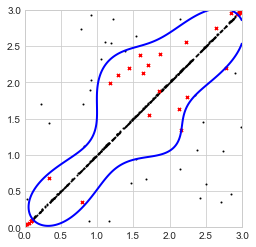

In [50]:
# Plot Data and Model Boundary
plt.figure(1)
legend = {}
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,3])
axes.set_aspect('equal')
xx1, yy1 = np.meshgrid(np.linspace(0,3,500), np.linspace(0,3,500))
Z1 = classifier.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour(xx1, yy1, Z1, levels=[0], linewidths=2, colors='b')
plt.scatter(correct_predictions[0], correct_predictions[1], s=1, c='k')
plt.scatter(incorrect_predictions[0], incorrect_predictions[1], marker='x', c='r', s=10)

In [51]:
number_correct = len(correct_predictions[0])
number_incorrect = len(incorrect_predictions[0])
correct_percentage = 100*(number_correct/(number_correct+number_incorrect))

print(f"Correct Predictions: {number_correct}")
print(f"Incorrect Predictions: {number_incorrect}")
print(f"Percent Correct: {correct_percentage}")

Correct Predictions: 414
Incorrect Predictions: 36
Percent Correct: 92.0


### Bagged Model

In [52]:
classifier = BaggingClassifier(base_estimator=OneClassSVM(gamma='scale', nu=1.0/9.0), n_estimators=10).fit(fit_data, np.zeros(450))

In [53]:
# Separate Correct and Incorrect Classifications
predictions = classifier.predict(fit_data)
correct_predictions = [[], []]
incorrect_predictions = [[], []]
for n in range(number_of_positive_entries):
    if(predictions[n] == 1):
        correct_predictions[0].append(fit_data[n][0])
        correct_predictions[1].append(fit_data[n][1])
    else:
        incorrect_predictions[0].append(fit_data[n][0])
        incorrect_predictions[1].append(fit_data[n][1])

for n in range(number_of_negative_entries):
    if(predictions[400+n] == 1):
        incorrect_predictions[0].append(fit_data[number_of_positive_entries+n][0])
        incorrect_predictions[1].append(fit_data[number_of_positive_entries+n][1])
    else:
        correct_predictions[0].append(fit_data[number_of_positive_entries+n][0])
        correct_predictions[1].append(fit_data[number_of_positive_entries+n][1])

IndexError: index 1 is out of bounds for axis 1 with size 1

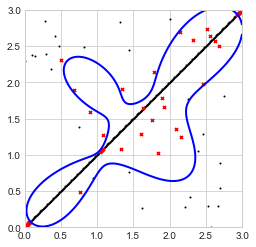

In [ ]:
plt.figure(2)
legend = {}
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,3])
axes.set_aspect('equal')
xx1, yy1 = np.meshgrid(np.linspace(0,3,500), np.linspace(0,3,500))
Z1 = classifier.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour(xx1, yy1, Z1, levels=[0], linewidths=2, colors='b')
plt.scatter(correct_predictions[0], correct_predictions[1], s=1, c='k')
plt.scatter(incorrect_predictions[0], incorrect_predictions[1], marker='x', c='r', s=10)

In [ ]:
number_correct = len(correct_predictions[0])
number_incorrect = len(incorrect_predictions[0])
correct_percentage = 100*(number_correct/(number_correct+number_incorrect))

print(f"Correct Predictions: {number_correct}")
print(f"Incorrect Predictions: {number_incorrect}")
print(f"Percent Correct: %{correct_percentage}")


Correct Predictions: 400
Incorrect Predictions: 50
Percent Correct: %88.88888888888889


## Square Model

### Unbagged Model

In [ ]:
# Build Square Noise Data
x_positive = np.zeros(400)
y_positive = np.zeros(400)
x_negative = np.zeros(50)
y_negative = np.zeros(50)

# Generate positive values
for n in range(0, 400):
    set_index = random.randint(0, 3) # 4 Possible sets that makeup a square
    if(set_index == 0):
        x_positive[n] = random.uniform(0.4, 2.6)
        y_positive[n] = random.uniform(0.4, 0.6)
    elif(set_index == 1):
        x_positive[n] = random.uniform(0.4, 2.6)
        y_positive[n] = random.uniform(2.4, 2.6)
    elif(set_index == 2):
        x_positive[n] = random.uniform(0.4, 0.6)
        y_positive[n] = random.uniform(0.4, 2.6)
    elif(set_index == 3):
        x_positive[n] = random.uniform(2.4, 2.6)
        y_positive[n] = random.uniform(0.4, 2.6)

# Generate negative values
for n in range(0, 50):
    x_negative[n] = random.uniform(0, 3)
    y_negative[n] = random.uniform(0, 3)

# Generate Training (Fit) Data
fit_data = np.zeros((450,2))
for n in range(400):
    fit_data[n][0] = x_positive[n]
    fit_data[n][1] = y_positive[n]

for n in range(50):
    fit_data[n+400][0] = x_negative[n]
    fit_data[n+400][1] = y_negative[n]

target_values = np.zeros(450)

for n in range(450):
    if n<400:
        target_values[n] = 1
    else:
        target_values[n] = -1    

In [ ]:
# Generate positive values
for n in range(0, 400):
    set_index = random.randint(0, 3) # 4 Possible sets that makeup a square
    if(set_index == 0):
        x_positive[n] = random.uniform(0.4, 2.6)
        y_positive[n] = random.uniform(0.4, 0.6)
    elif(set_index == 1):
        x_positive[n] = random.uniform(0.4, 2.6)
        y_positive[n] = random.uniform(2.4, 2.6)
    elif(set_index == 2):
        x_positive[n] = random.uniform(0.4, 0.6)
        y_positive[n] = random.uniform(0.4, 2.6)
    elif(set_index == 3):
        x_positive[n] = random.uniform(2.4, 2.6)
        y_positive[n] = random.uniform(0.4, 2.6)

# Generate negative values
for n in range(0, 50):
    x_negative[n] = random.uniform(0, 3)
    y_negative[n] = random.uniform(0, 3)

# Generate Test Data
test_data = np.zeros((450,2))
for n in range(400):
    test_data[n][0] = x_positive[n]
    test_data[n][1] = y_positive[n]

for n in range(50):
    test_data[n+400][0] = x_negative[n]
    test_data[n+400][1] = y_negative[n]

test_target_values = np.zeros(450)

for n in range(450):
    if n<400:
        test_target_values[n] = 1
    else:
        test_target_values[n] = -1  

#### Train Model

In [ ]:
classifier = OneClassSVM(gamma='auto', nu=1.0/9.0).fit(fit_data)

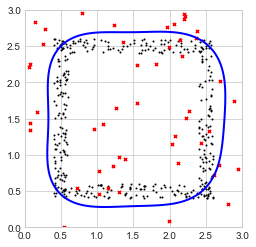

In [ ]:
plt.figure(3)
legend = {}
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,3])
axes.set_aspect('equal')
xx1, yy1 = np.meshgrid(np.linspace(0,3,500), np.linspace(0,3,500))
Z1 = classifier.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour(xx1, yy1, Z1, levels=[0], linewidths=2, colors='b')
plt.scatter(x_positive, y_positive, c='k', s=1)
plt.scatter(x_negative, y_negative, c='r', marker='x',  s=10)

#### Test Model

In [ ]:
predictions = classifier.fit(test_data)

In [ ]:
# Separate Correct and Incorrect Classifications
correct_predictions = [[], []]
incorrect_predictions = [[], []]
for n in range(400):
    if(predictions[n] == 1):
        correct_predictions[0].append(fit_data[n][0])
        correct_predictions[1].append(fit_data[n][1])
    else:
        incorrect_predictions[0].append(fit_data[n][0])
        incorrect_predictions[1].append(fit_data[n][1])

for n in range(50):
    if(predictions[400+n] == 1):
        incorrect_predictions[0].append(fit_data[400+n][0])
        incorrect_predictions[1].append(fit_data[400+n][1])
    else:
        correct_predictions[0].append(fit_data[400+n][0])
        correct_predictions[1].append(fit_data[400+n][1])

TypeError: 'OneClassSVM' object is not subscriptable

In [ ]:
number_correct = len(correct_predictions[0])
number_incorrect = len(incorrect_predictions[0])
correct_percentage = 100*(number_correct/(number_correct+number_incorrect))

print(f"Correct Predictions: {number_correct}")
print(f"Incorrect Predictions: {number_incorrect}")
print(f"Percent Correct: %{correct_percentage}")

Correct Predictions: 387
Incorrect Predictions: 63
Percent Correct: %86.0


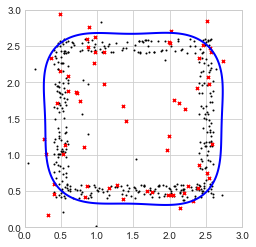

In [ ]:
plt.figure(4)
legend = {}
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,3])
axes.set_aspect('equal')
xx1, yy1 = np.meshgrid(np.linspace(0,3,500), np.linspace(0,3,500))
Z1 = classifier.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour(xx1, yy1, Z1, levels=[0], linewidths=2, colors='b')
plt.scatter(correct_predictions[0], correct_predictions[1], c='k', s=1)
plt.scatter(incorrect_predictions[0], incorrect_predictions[1], c='r', marker='x',  s=10)

In [ ]:
classifier.decision_function(test_data)

array([ 6.36407395e-01,  7.58998739e-01,  9.14558003e-01,  7.57187915e-01,
        6.07039438e-01,  3.51773331e-01,  4.34427625e-01,  8.28289144e-01,
        4.61414294e-01,  6.96761177e-02,  6.81121018e-01,  5.50139285e-01,
        6.25515921e-02,  7.15703184e-01,  5.05634658e-01,  9.99180148e-01,
        6.18668285e-01, -3.28710206e-01,  7.35917314e-01, -2.05422228e-01,
        3.56423269e-01, -1.09379922e-01,  4.07274607e-01,  4.87585566e-01,
        1.31812241e-01,  7.96606664e-01,  5.18734207e-01,  9.32282729e-01,
       -2.17562697e-01,  5.19921342e-01,  5.98395658e-01,  9.16553158e-01,
        7.61971556e-01,  7.15846651e-01,  7.63898162e-01,  2.79827014e-01,
        3.51244301e-01,  1.37188467e-01, -2.37625832e-04,  8.59899629e-01,
        7.71569392e-01,  3.74088789e-01,  2.35031179e-01,  4.25358445e-01,
       -2.95205564e-01,  6.70511541e-01,  2.59291876e-01,  3.27957401e-01,
        2.90293963e-01,  4.60444427e-01,  4.37619671e-01,  8.28197941e-01,
        2.43411048e-01,  

### Bagged Model

In [ ]:
classifier = BaggingClassifier(base_estimator=OneClassSVM(gamma='scale', nu=1.0/9.0), n_estimators=10, random_state=1).fit(fit_data, target_values)

In [ ]:
# Separate Correct and Incorrect Classifications
predictions = classifier.predict(fit_data)
correct_predictions = [[], []]
incorrect_predictions = [[], []]
for n in range(400):
    if(predictions[n] == 1):
        correct_predictions[0].append(fit_data[n][0])
        correct_predictions[1].append(fit_data[n][1])
    else:
        incorrect_predictions[0].append(fit_data[n][0])
        incorrect_predictions[1].append(fit_data[n][1])

for n in range(50):
    if(predictions[400+n] == 1):
        incorrect_predictions[0].append(fit_data[400+n][0])
        incorrect_predictions[1].append(fit_data[400+n][1])
    else:
        correct_predictions[0].append(fit_data[400+n][0])
        correct_predictions[1].append(fit_data[400+n][1])

In [ ]:
plt.figure(4)
legend = {}
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,3])
axes.set_aspect('equal')
xx1, yy1 = np.meshgrid(np.linspace(0,3,500), np.linspace(0,3,500))
Z1 = classifier.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour(xx1, yy1, Z1, levels=[0], linewidths=2, colors='b')
plt.scatter(correct_predictions[0], correct_predictions[1], s=1, c='k')
plt.scatter(incorrect_predictions[0], incorrect_predictions[1], marker='x', c='r', s=10)

In [ ]:
# Separate Correct and Incorrect Classifications
predictions = classifier.predict(test_data)
correct_predictions = [[], []]
incorrect_predictions = [[], []]
for n in range(400):
    if(predictions[n] == 1):
        correct_predictions[0].append(fit_data[n][0])
        correct_predictions[1].append(fit_data[n][1])
    else:
        incorrect_predictions[0].append(fit_data[n][0])
        incorrect_predictions[1].append(fit_data[n][1])

for n in range(50):
    if(predictions[400+n] == 1):
        incorrect_predictions[0].append(fit_data[400+n][0])
        incorrect_predictions[1].append(fit_data[400+n][1])
    else:
        correct_predictions[0].append(fit_data[400+n][0])
        correct_predictions[1].append(fit_data[400+n][1])

In [ ]:
classifier.decision_function(test_data)

In [ ]:
number_correct = len(correct_predictions[0])
number_incorrect = len(incorrect_predictions[0])
correct_percentage = 100*(number_correct/(number_correct+number_incorrect))

print(f"Correct Predictions: {number_correct}")
print(f"Incorrect Predictions: {number_incorrect}")
print(f"Percent Correct: %{correct_percentage}")

In [ ]:
predictions

## Circle Model

In [ ]:
mean = 1.5
variance = 0.1
std_deviation = variance**0.5

x_positive = np.random.normal(mean, std_deviation, 450)
y_positive = np.random.normal(mean, std_deviation, 450)

In [ ]:
plt.figure(3)
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,3])
axes.set_aspect('equal')
plt.scatter(x_positive, y_positive, s=1)